\newpage

## Question 1

We consider the open the surface weather dataset at https://www.kaggle.com/datasets/noaa/gsod

(a) The `gust` variable is Maximum wind gust reported for the day in knots to tenths. Missing = 999.9 The `visib` variable is Mean visibility for the day in miles to tenths. Missing = 999.9

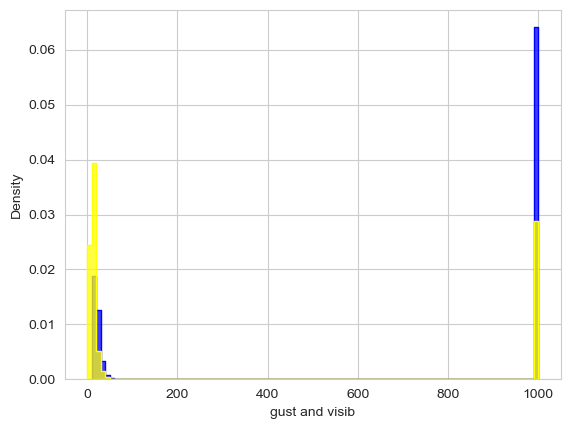

In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df= pd.read_csv('https://gist.githubusercontent.com/krisrs1128/3845514e2d5eef57ec3271ea20fdcdb1/raw/44f9860df64b280e6b4c155f144c67bea1825edd/noaa-gosd.csv')

selected_columns = df[['gust','visib']]
sns.histplot(
    data=selected_columns,
    x='gust',
    binwidth=10,
    stat='density',
    common_norm=True,
    element='step',
    color='blue'
    )
sns.histplot(
    data=selected_columns,
    x='visib',
    binwidth=10,
    stat='density',
    common_norm=True,
    element='step',
    color='yellow'
    )
plt.xlabel("gust and visib")
plt.show()

The histrogrom shows there has two extremes, and I think it contains tainted data.

(b) Next, we identify missing values in the the `gust` and `visib` variables using the observation from the website. We know that 999.9 is the missing value therefor we will replace 999.9 to NaN

In [2]:
clean_selected_columns=selected_columns.replace(999.9,np.nan)
clean_selected_columns

,gust,visib
0,17.1,3.0
1,NaN,NaN
2,NaN,NaN
3,18.1,NaN
4,19.6,NaN
...,...,...
9995,17.1,10.0
9996,NaN,12.4
9997,9.7,3.2
9998,24.1,5.8


(c) The histograms of the `gust` and `visib` variables again, ignoring any missing values.

In [3]:
clean_selected_columns.describe()

,gust,visib
count,3591.000000,7114.000000
mean,20.990058,12.871535
std,8.072542,7.105767
min,9.700000,0.200000
25%,15.700000,8.600000
50%,19.000000,12.400000
75%,25.100000,15.000000
max,80.600000,60.000000


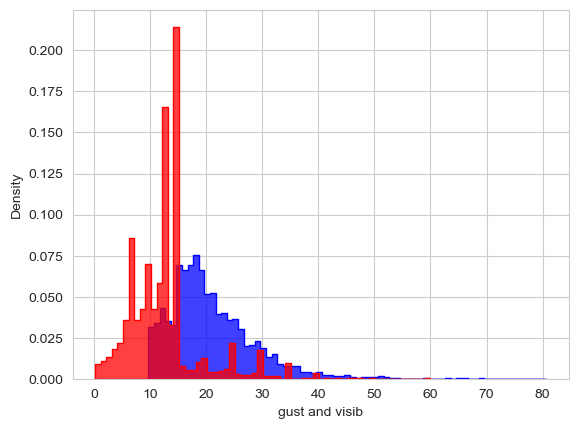

In [4]:
sns.histplot(
    data=clean_selected_columns,
    x='gust',
    binwidth=1,
    stat='density',
    common_norm=True,
    element='step',
    color='blue'
    )
sns.histplot(
    data=clean_selected_columns,
    x='visib',
    binwidth=1,
    stat='density',
    common_norm=True,
    element='step',
    color='red'
    )
plt.xlabel("gust and visib")
plt.show()



The range of gust is 80.6 - 0 = 80.6 and range of visib is 60 - 0 = 60
For the both graph of gust and visib, they are right skewed. We have shown the visibility that has the highest frequency are approximately between 15 and 20 miles. The frequceny of visibility are steady decline when it exceed 20 miles.
The maximum frequecny of gust are reported approxiamtely at 15 knots. The frequency of gust dramasticly decrease once the value is greater than 15 knots.

\newpage

## Question 2

We consider [Spotify Tracks DB dataset from Kaggle](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) for the following analysis. 

(a) We find the dimension of the Spotify dataset.

In [5]:
import pandas as pd

df_spo = pd.read_csv("SpotifyFeatures.csv")
print("observations: "+ str(len(df_spo)))
print("variables: "+ str(len(df_spo.columns)))

observations: 232725
variables: 18


There are 232725 observations and 18 variables.

(b) we find the duplicated track_id

In [6]:
df_spo['track_id'].is_unique

False

it mean there are duplicated track_id in this dataset

In [7]:
df_spo['track_id'].duplicated().sum()

55951

The total duplicated track_id are 55951 observations

In [8]:
unique_df_spo = df_spo.drop_duplicates(subset=['track_id'])
len(unique_df_spo)

176774

unique dataset contain total 176774 observations

(c) find type of the above variables

In [9]:
unique_df_spo.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

(d) find different `genres` are in the data

In [10]:
print(f"there are total {unique_df_spo['genre'].nunique()} unique type of genres")

there are total 27 unique type of genres


(e) Compute the average popularity of each genre and report the five most popular genres.

In [11]:
average = unique_df_spo['genre'].value_counts()

select2 = unique_df_spo.groupby(['genre']).agg({'popularity':'sum'})
select2.squeeze()

average_genre = select2.squeeze().div(average)
average_genre.sort_values(ascending=False)

genre
Pop                 67.064957
Rap                 59.515797
Rock                58.767849
Hip-Hop             58.516660
Dance               57.351541
Indie               53.528933
Children’s Music    52.302465
Alternative         50.257944
Folk                49.671347
R&B                 48.463665
Country             44.248679
Soul                43.491874
Jazz                39.885060
Electronic          37.592305
Reggaeton           36.480290
Reggae              35.390123
World               34.416029
Blues               33.683851
Soundtrack          33.681958
Classical           29.320170
Ska                 27.441063
Anime               24.256184
Comedy              21.320240
Opera               13.335628
Movie               12.146629
A Capella            9.302521
Children's Music     4.245650
dtype: float64

average genre Show above

In [12]:
value = average_genre.sort_values(ascending=False).head().index.tolist()
popular_df_spo = unique_df_spo.loc[df_spo['genre'].isin(value)]
popular_df_spo['genre'].value_counts().index

Index(['Dance', 'Hip-Hop', 'Pop', 'Rock', 'Rap'], dtype='object', name='genre')

 Here is the top five popular genres 'Dance', 'Hip-Hop', 'Pop', 'Rock', 'Rap'

(f) Explore the distribution of `genre` using the appropriate visualization method and interpret the plot.

<Axes: xlabel='genre', ylabel='count'>

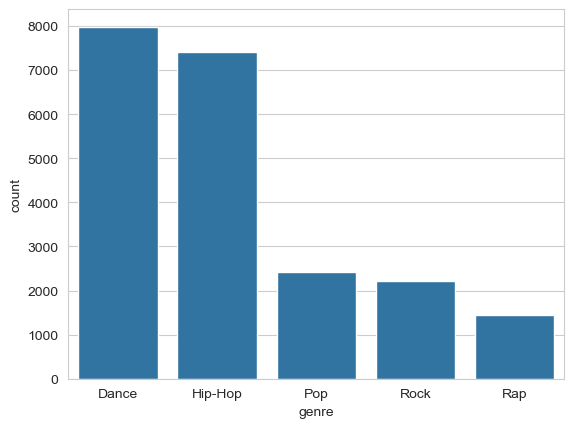

In [13]:
popular_df_spo.dtypes

sns.countplot(
    data=popular_df_spo,
    x='genre',
    order= popular_df_spo['genre'].value_counts().index
)


(g) Explore the association between `genre` and `popularity`

C:\Users\SuperChris\AppData\Local\Temp\ipykernel_21400\2034504652.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  popu_genre.set_xticklabels(


Text(0.5, 1.0, 'Association between popularity and genre')

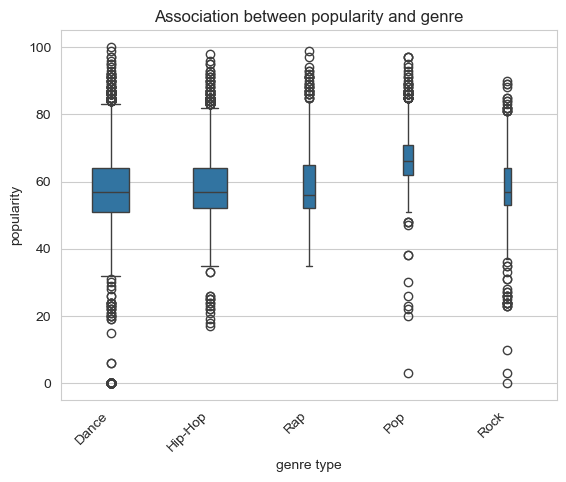

In [14]:
# popular_df_spo.info
genre_count = popular_df_spo['genre'].value_counts()
relative_frequency = genre_count / len(popular_df_spo)

popu_genre = sns.boxplot(
    data=popular_df_spo,
    x='genre',
    y='popularity',
    width=relative_frequency
)

popu_genre.set_xticklabels(
    popu_genre.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.xlabel('genre type')
plt.ylabel('popularity')
plt.title('Association between popularity and genre')


(h) Explore the relationship between `acousticness` and `popularity.`

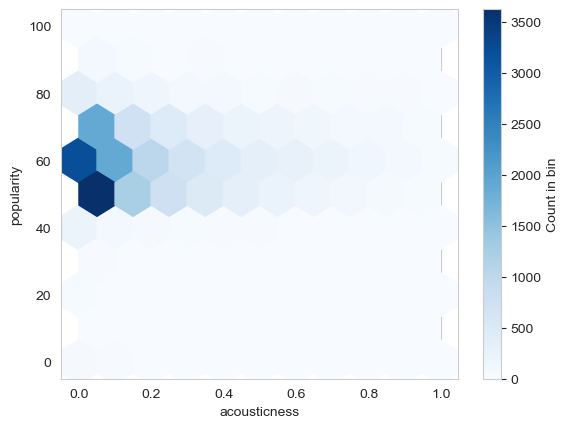

In [15]:
plt.hexbin(
    popular_df_spo['acousticness'],
    popular_df_spo['popularity'],
    gridsize=10,
    cmap='Blues'
    )
plt.colorbar(label='Count in bin')
plt.xlabel('acousticness')
plt.ylabel('popularity')
plt.show()